In [32]:
data_path = 'dataset 2/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
data = pd.read_csv(data_path)
data.head(3)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


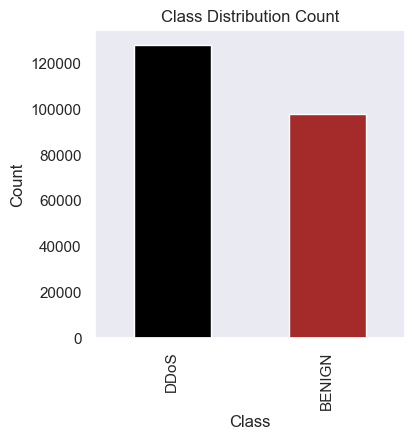

In [33]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.set_theme(style="darkgrid") 
plt.figure(figsize=(4,4))
data[' Label'].value_counts().plot(kind='bar', color=['black', 'brown'])
plt.title('Class Distribution Count')
plt.ylabel('Count')
plt.xlabel('Class')
plt.grid()

In [34]:
# stripping columns.... 
new_col = {}
for col in data.columns: 
    new_col[col] = col.strip()

# stripping columns.... 
new_col = {}
for col in data.columns: 
    new_col[col] = col.strip()

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       225745 non-null  object 
 1    Source IP                    225745 non-null  object 
 2    Source Port                  225745 non-null  int64  
 3    Destination IP               225745 non-null  object 
 4    Destination Port             225745 non-null  int64  
 5    Protocol                     225745 non-null  int64  
 6    Timestamp                    225745 non-null  object 
 7    Flow Duration                225745 non-null  int64  
 8    Total Fwd Packets            225745 non-null  int64  
 9    Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets   225745 non-null  int64  
 11   Total Length of Bwd Packets  225745 non-null  int64  
 12   Fwd Packet Length Max        225745 non-nul

In [36]:
data[data.columns[0]].values

array(['192.168.10.5-104.16.207.165-54865-443-6',
       '192.168.10.5-104.16.28.216-55054-80-6',
       '192.168.10.5-104.16.28.216-55055-80-6', ...,
       '192.168.10.15-72.21.91.29-61375-80-6',
       '192.168.10.15-8.41.222.187-61323-80-6',
       '192.168.10.15-8.43.72.21-61326-80-6'], dtype=object)

In [37]:
print(data.isnull().sum().sum())
print(data.isnull().sum().sum())
data = data[data['Flow Bytes/s'].isnull() == False]
data.head(3)

4
4


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [42]:
data.rename(columns=new_col, inplace=True)
data.columns

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

In [43]:
for col in data.columns: 
    if data[col].dtype == 'object': 
        data[col] = data[col].astype('category').cat.codes


In [44]:
import numpy as np
print(np.isinf(data).sum().sum())

0


In [45]:
for col in data.columns: 
    if np.isinf(data[col]).sum() > 0:
        print(col, ' : ' , np.isinf(data[col]).sum())

In [46]:
data = data[np.isinf(data['Flow Bytes/s']) != True]
data = data[np.isinf(data['Flow Packets/s']) != True]

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225711 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      225711 non-null  int32  
 1   Source IP                    225711 non-null  int16  
 2   Source Port                  225711 non-null  int64  
 3   Destination IP               225711 non-null  int16  
 4   Destination Port             225711 non-null  int64  
 5   Protocol                     225711 non-null  int64  
 6   Timestamp                    225711 non-null  int8   
 7   Flow Duration                225711 non-null  int64  
 8   Total Fwd Packets            225711 non-null  int64  
 9   Total Backward Packets       225711 non-null  int64  
 10  Total Length of Fwd Packets  225711 non-null  int64  
 11  Total Length of Bwd Packets  225711 non-null  int64  
 12  Fwd Packet Length Max        225711 non-null  int64  
 13 

In [48]:
for col in data.columns: 
        data[col] = data[col].astype('int8')
        # print(data[col].unique())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225711 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   Flow ID                      225711 non-null  int8 
 1   Source IP                    225711 non-null  int8 
 2   Source Port                  225711 non-null  int8 
 3   Destination IP               225711 non-null  int8 
 4   Destination Port             225711 non-null  int8 
 5   Protocol                     225711 non-null  int8 
 6   Timestamp                    225711 non-null  int8 
 7   Flow Duration                225711 non-null  int8 
 8   Total Fwd Packets            225711 non-null  int8 
 9   Total Backward Packets       225711 non-null  int8 
 10  Total Length of Fwd Packets  225711 non-null  int8 
 11  Total Length of Bwd Packets  225711 non-null  int8 
 12  Fwd Packet Length Max        225711 non-null  int8 
 13  Fwd Packet Length Min        

<Axes: >

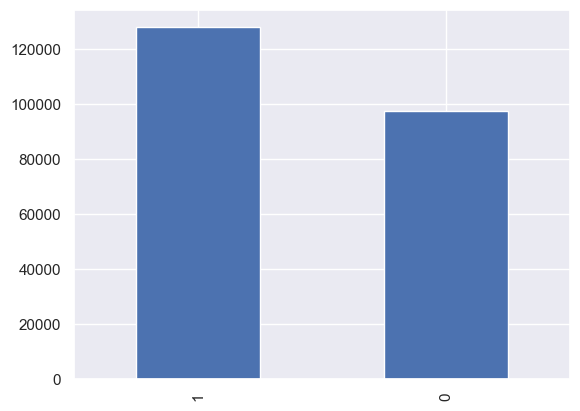

In [57]:
data.Label.value_counts().plot(kind='bar')

In [58]:
data

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,41,22,-69,98,81,6,0,3,2,0,...,20,0,0,0,0,0,0,0,0,0
1,73,37,80,98,14,6,0,109,1,1,...,20,0,0,0,0,0,0,0,0,0
2,74,37,80,98,15,6,0,52,1,1,...,20,0,0,0,0,0,0,0,0,0
3,18,45,-69,92,-100,6,0,34,1,1,...,20,0,0,0,0,0,0,0,0,0
4,79,49,-69,98,79,6,0,3,2,0,...,20,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,-68,-123,80,91,-66,6,92,61,1,1,...,20,0,0,0,0,0,0,0,0,0
225741,-64,-123,80,91,-62,6,92,72,1,1,...,20,0,0,0,0,0,0,0,0,0
225742,-67,-123,80,91,-65,6,92,75,1,1,...,20,0,0,0,0,0,0,0,0,0
225743,24,-65,80,91,-117,6,92,48,2,0,...,20,0,0,0,0,0,0,0,0,0


In [68]:
df = data.sample(50000)

In [69]:
X, y = df.drop(columns=['Label']) , df.Label
X.shape 

(50000, 84)

In [70]:
scaler = StandardScaler()

# Fit and transform training data
X_scalled = scaler.fit_transform(X)
X_scalled

array([[ 0.39640828, -0.47374107,  1.42477367, ...,  0.04935505,
         0.10457492,  0.05772643],
       [ 0.97785751, -0.47374107, -1.4508465 , ...,  0.04935505,
        -2.0006514 , -2.10323293],
       [-0.56365904, -0.47374107,  0.46623361, ...,  4.16985851,
         2.20980125,  1.25075607],
       ...,
       [-0.78001224,  0.50085335,  0.95225392, ...,  0.04935505,
         0.38965766,  0.35035634],
       [-1.69951334,  0.12957929,  1.2222652 , ..., -0.07941069,
        -2.70239351, -1.11279322],
       [ 0.34231998, -0.47374107,  0.47973418, ...,  0.04935505,
         0.10457492,  0.05772643]])

In [71]:
# Apply SMOTE to balance the dataset
smote = SMOTEENN()
X_resampled, y_resampled = smote.fit_resample(X_scalled, y)

1    28306
0    28172
Name: Label, dtype: int64


<Figure size 400x400 with 0 Axes>

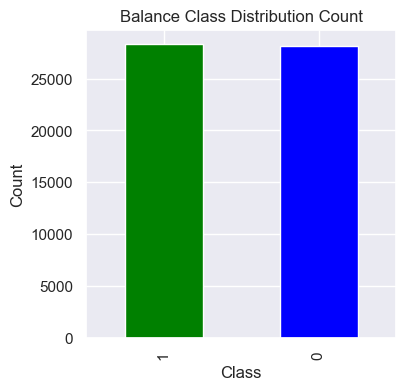

In [72]:
print(y_resampled.value_counts())


plt.figure(figsize=(4,4))
sn.set_style(style='darkgrid')
plt.figure(figsize=(4,4))
y_resampled.value_counts().plot(kind='bar', color=['green', 'blue'])
plt.title('Balance Class Distribution Count')
plt.ylabel('Count')
plt.xlabel('Class')
plt.grid()
plt.grid()

In [73]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled)
X_train.shape

(45182, 84)

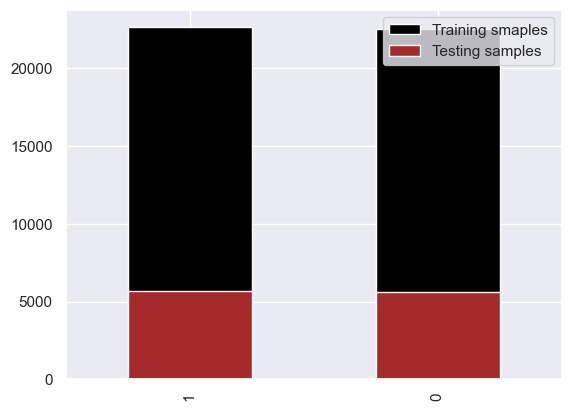

In [74]:
# confirming if the training the testing sample is balance 
y_train.value_counts().plot(kind='bar', color=['black', 'black'])
y_test.value_counts().plot(kind='bar', color=['brown', 'brown'])
plt.legend(labels=['Training smaples', 'Testing samples'])

In [76]:
def compute_metrics(tp, fp, fn, tn, avg_detection_time=None):

    # Safety check to prevent division by zero
    total = tp + fp + fn + tn
    positive = tp + fn
    negative = tn + fp

    # Metrics calculations
    tpr = tp / positive if positive > 0 else 0  # True Positive Rate (Recall)
    fpr = fp / negative if negative > 0 else 0  # False Positive Rate
    fnr = fn / positive if positive > 0 else 0  # False Negative Rate
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tpr  # Recall is the same as TPR
    specificity = tn / negative if negative > 0 else 0
    accuracy = (tp + tn) / total if total > 0 else 0

    # Pack into dictionary
    metrics = {
        "TPR (Recall)": tpr,
        "FPR": fpr,
        "FNR": fnr,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Specificity": specificity,
        "AVG EXE TIME": f'{avg_detection_time:.8f}'
    }

    return metrics  

In [78]:
# mergin everything...
class DBN_network: 

    def __init__(self, neurons=100, learning_rate=0.8, epoch=4): 
        self.neurons = neurons
        self.learning_rate=learning_rate 
        self.epoch = epoch
        self.layers_objects = []
        print('parameter initialize...')

    def config_network(self, neurons, layers=2, learning_rate=0.8):
        self.layers_objects = []
        if layers != len(neurons):
            print(f' Neuron List Value {len(neurons)} must equal Layer value {layers} layers')
        else: 
            for ep in range(layers): 
                # print(f' \n Epoch : {ep}')
                ly = BernoulliRBM(n_components=neurons[ep], learning_rate=learning_rate, n_iter=4, verbose=1)
                self.layers_objects.append(ly)
                # print(ly)

            # specify the classification head
            classifier = LogisticRegression(max_iter=1000)
            self.layers_objects.append(classifier)
            
   # to visualize the architecture using pipeline
    def summary(self):
        # using pipeline to visualize the DBN Architecture.... 
        arch_list = []
        for item in range(len(self.layers_objects)):
            arch_list.append((f'layer_{item+1}', self.layers_objects[item]))
        
        self.arch_summary = Pipeline(
            arch_list
        )

        print('DBN architecture Summary')
        return self.arch_summary

    # function to train the model... 
    def fit_model(self, X_train, y_train): 
        print(f'Training For {len(self.layers_objects[:-1])} Layer')
        self.fited_arch = []
        init_sample = X_train
        init_y = y_train
        count = 0 
        for layer in self.layers_objects[:-1]:
            print(f'\n *******************  EPOCH {count + 1} **********************')
            # fit and transform....  
            fited = layer.fit(init_sample)
            feature  = fited.transform(init_sample)
        
            # update weights
            init_sample = feature
        
            # store layer weights
            self.fited_arch.append(fited)
            count = count + 1
            
        # fit the classification head 
        print('\n+-----------------------------------------+')
        self.class_head = self.layers_objects[-1].fit(init_sample, init_y)
        
        return self.arch_summary

    # prediction  function 
    def predict(self, X_test, y_test): 
        init_sample = X_test
        init_y = y_test
        for layer in self.fited_arch:
            
            # transform....  
            feature  = layer.transform(init_sample)
            
            # update weights
            init_sample = feature
            print(f'Calculated Feature {init_sample.shape}')
                           
        # fit the classification head 
        if self.fited_arch != []: 
            prediction = self.class_head.predict(init_sample)
            pre = {'pre': prediction}
            return pre
        else: 
            error = 'Error: model should be trained first....'
            return {error, []}

In [79]:
# initializaing DBN
dbn = DBN_network()
# configure the DBN... 
dbn.config_network([84, 84, 42, 42, 12], layers=5, learning_rate=0.09455)

# showing the DBN architecture.. 
dbn.summary()

parameter initialize...
DBN architecture Summary


Pipeline(steps=[('layer_1',
                 BernoulliRBM(learning_rate=0.09455, n_components=84, n_iter=4,
                              verbose=1)),
                ('layer_2',
                 BernoulliRBM(learning_rate=0.09455, n_components=84, n_iter=4,
                              verbose=1)),
                ('layer_3',
                 BernoulliRBM(learning_rate=0.09455, n_components=42, n_iter=4,
                              verbose=1)),
                ('layer_4',
                 BernoulliRBM(learning_rate=0.09455, n_components=42, n_iter=4,
                              verbose=1)),
                ('layer_5',
                 BernoulliRBM(learning_rate=0.09455, n_components=12, n_iter=4,
                              verbose=1)),
                ('layer_6', LogisticRegression(max_iter=1000))])

In [ ]:
architecture.. 
dbn.summary()

In [80]:
# training the arhitecture
strt_time = time.time()
dbn.fit_model(X_train, y_train)
stop_time = time.time()

data_1_total_training_time = stop_time - strt_time
print('Total Training Time : ', data_1_total_training_time)

Training For 5 Layer

 *******************  EPOCH 1 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -19798.31, time = 3.24s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -37766.20, time = 3.40s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -54157.06, time = 3.08s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -70442.07, time = 5.04s

 *******************  EPOCH 2 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -77.04, time = 3.01s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -2.39, time = 3.92s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -3.80, time = 3.78s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -7.10, time = 3.76s

 *******************  EPOCH 3 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -1.33, time = 2.29s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1.06, time = 2.54s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -6.00, time = 2.55s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -4.2

Calculated Feature (11296, 84)
Calculated Feature (11296, 84)
Calculated Feature (11296, 42)
Calculated Feature (11296, 42)
Calculated Feature (11296, 12)

EXE TIME
Total Detection Time : 0.291001
AVG Detection Time : 0.00002576 

              precision    recall  f1-score   support

           0       0.56      0.49      0.53      5635
           1       0.55      0.62      0.58      5661

    accuracy                           0.56     11296
   macro avg       0.56      0.56      0.55     11296
weighted avg       0.56      0.56      0.55     11296





<Axes: >

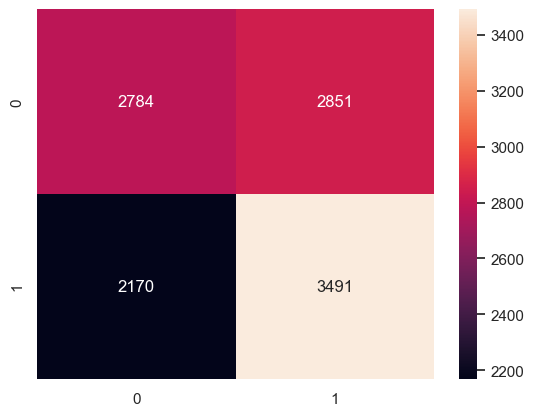

In [81]:
# make prediction
strt_time = time.time()
prediction = dbn.predict(X_test, y_test)
stop_time = time.time()

print('\nEXE TIME')
total_time  = stop_time - strt_time
avg_time = total_time / X_test.shape[0]
print(f'Total Detection Time : {total_time:.6f}')
print(f'AVG Detection Time : {avg_time:.8f} \n')

# evaluation report 
class_report = classification_report(y_test, prediction['pre'])
conf_report = confusion_matrix(y_test, prediction['pre'])
print(class_report)
print('\n')
sn.heatmap(conf_report, fmt='d', annot=True)

In [82]:
tp, fp, fn, tn = conf_report.ravel()
metrics1 = compute_metrics(tp, fp, fn, tn, avg_time)
print(metrics1)
result = pd.Series(metrics1)
CIC_DDos_result = result
CIC_DDos_result

{'TPR (Recall)': 0.5619701251513928, 'FPR': 0.4495427309996846, 'FNR': 0.43802987484860717, 'Accuracy': 0.5555063739376771, 'Precision': 0.4940550133096717, 'Recall': 0.5619701251513928, 'Specificity': 0.5504572690003153, 'AVG EXE TIME': '0.00002576'}


TPR (Recall)       0.56197
FPR               0.449543
FNR                0.43803
Accuracy          0.555506
Precision         0.494055
Recall             0.56197
Specificity       0.550457
AVG EXE TIME    0.00002576
dtype: object

In [60]:
# machine learning developement
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,f1_score
import pandas as pd
import os
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN
import seaborn as sn 
from matplotlib import pyplot as plt